<a href="https://colab.research.google.com/github/alanagadelha/MachineLearning/blob/main/Clusteriza%C3%A7%C3%A3o_IRIS_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trabalho Prático Aprendizado de Máquina Não Supervisionado

## Clusterização

1. Objetivo: Explorar algoritmos de clustering para identificar estruturas naturais nos
dados do conjunto Iris sem usar as classes verdadeiras, validando resultados com
métricas intrínsecas e extrínsecas.

a) Passar pelas fases de pré-processamento e análise exploratória. Comentar:
Quantos grupos naturais você consegue identificar visualmente?

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

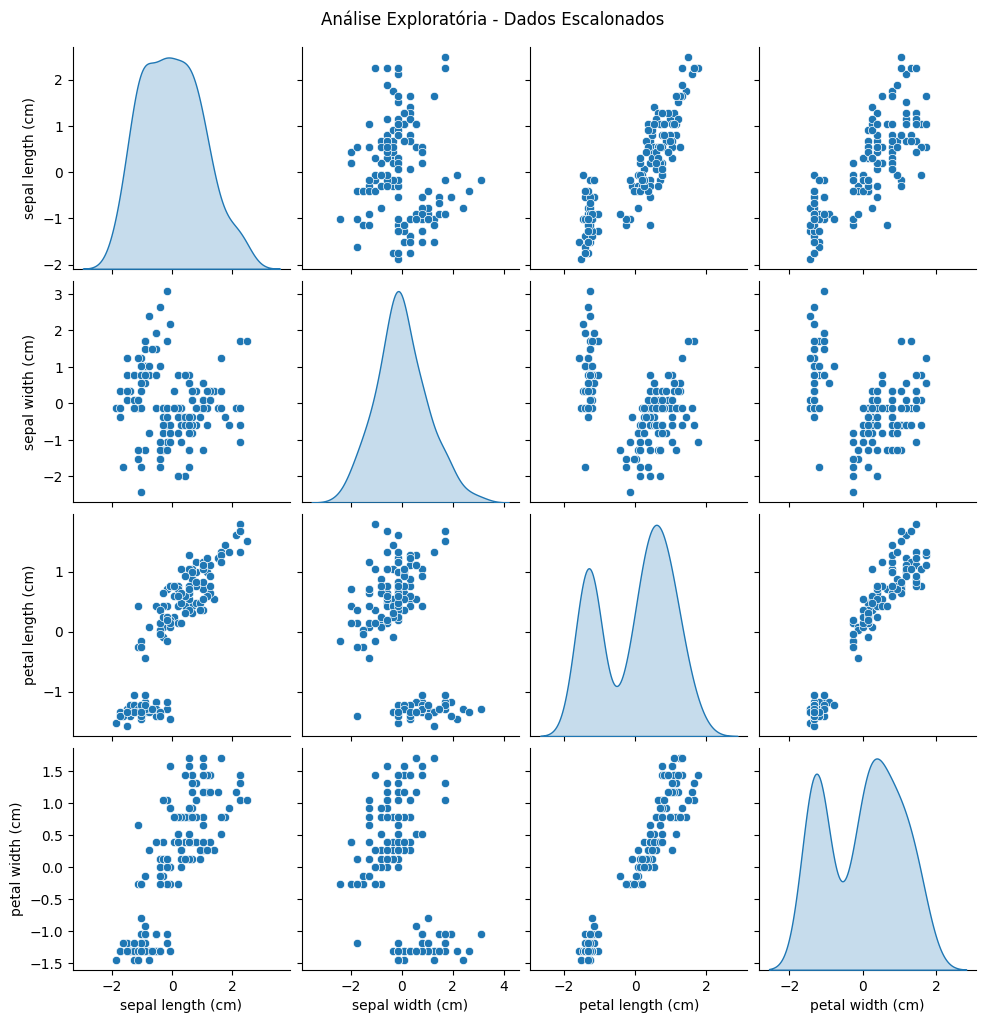

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Carregar o dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print(X.head(10))
print(y)
print(X.describe())

print("Verificação de existência de valores nulos", X.isnull().sum())

# Escalonar os dados
scaler = StandardScaler()
clustering_data = scaler.fit_transform(X)

# Visualização com duas primeiras features
sns.pairplot(pd.DataFrame(clustering_data, columns=iris.feature_names), diag_kind='kde')
plt.suptitle("Análise Exploratória - Dados Escalonados", y=1.02)
plt.show()

# Diferença entre os dois códigos:
### Primeiro código: visualiza os **dados escalonados, sem rótulos (hue)**.

### Segundo código: visualiza os **dados originais** com rótulo colorido, o que permite ver como as espécies estão distribuídas nas combinações de features.

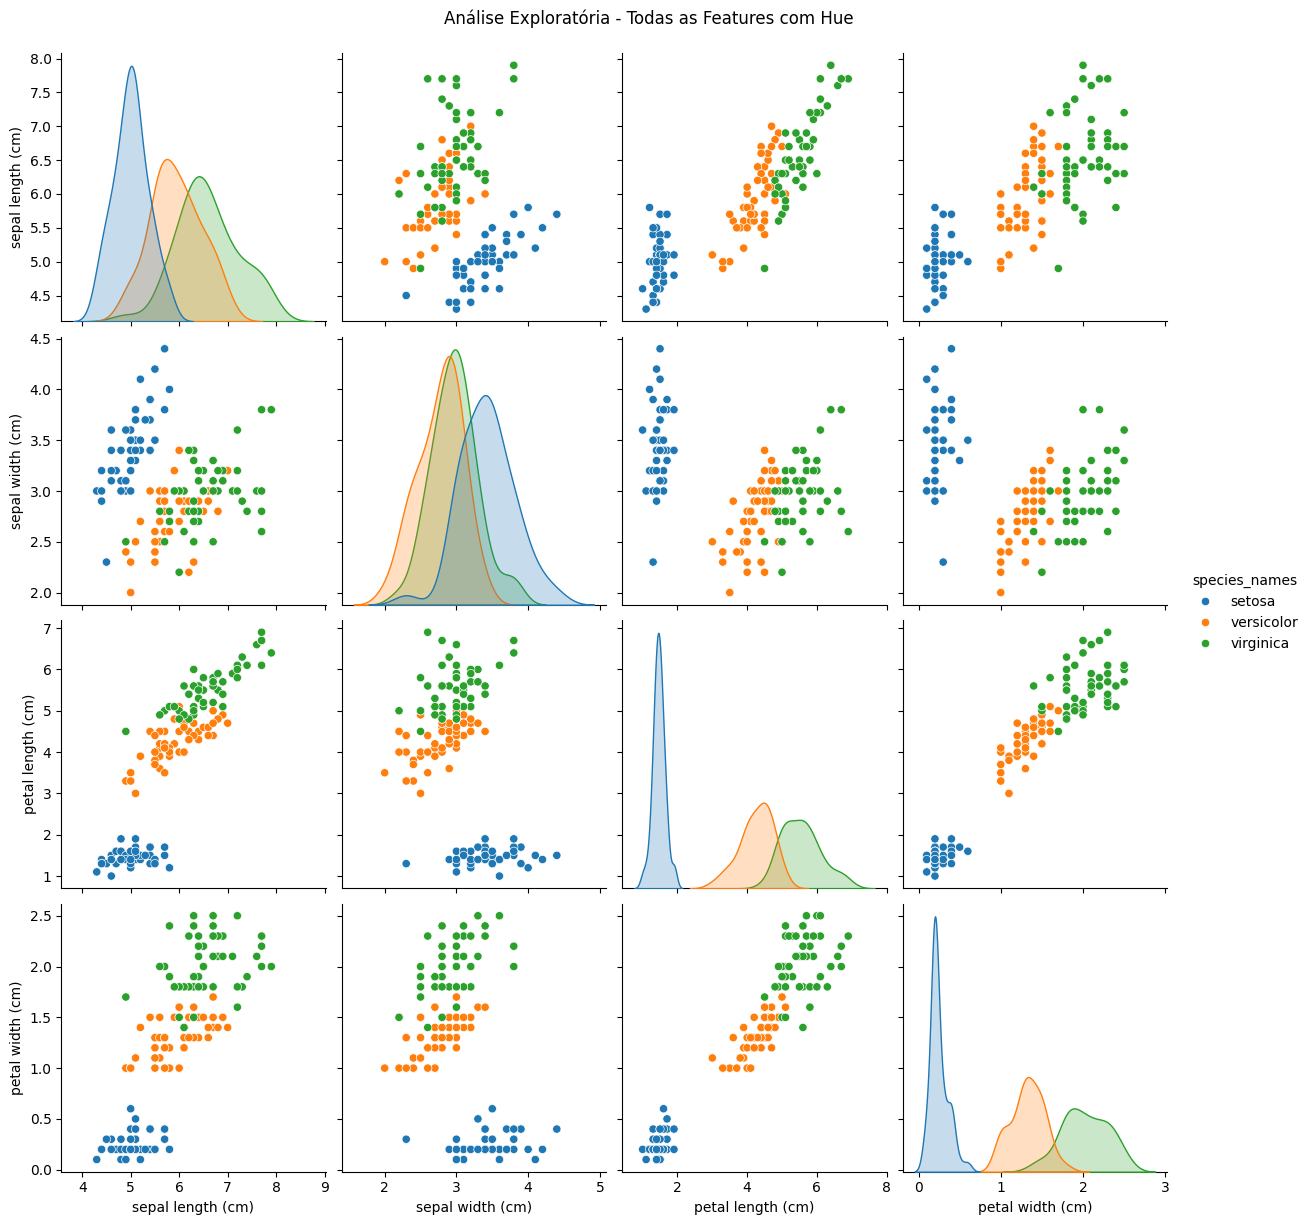

In [ ]:
# Adicionar os nomes das espécies
X["species_names"] = pd.Categorical.from_codes(y, iris.target_names)

# Agora sim o pairplot com hue
sns.pairplot(X, hue="species_names", height=3)
plt.suptitle("Análise Exploratória - Todas as Features com Hue", y=1.02)
plt.show()


In [ ]:
# Analisando os dados em Detalhes, por meio da Biblioteca `ProfileReport` que mostra um panorama geral dos dados

!pip install ydata-profiling -q
from ydata_profiling import ProfileReport
ProfileReport(X)

# Função do StandardScaler
O StandardScaler transforma cada feature (coluna) para ter:
Média = 0
Desvio padrão = 1

Ou seja, ele aplica a fórmula:
𝑥escalado = (𝑥−𝜇)/𝜎

Onde:
μ é a média da feature
σ é o desvio padrão da feature

Alguns algorítimos são sensíveis à magnitude dos valores e por isso a escalonação:
- Evita viés por magnitude de valores
- Melhora performance e estabilidade dos algoritmos
- É essencial para métodos baseados em distância, como K-Means.

## b) Aplicação do algoritmo K-Means:

i) Usar o método do cotovelo para escolher k (variando de 1 a 10)


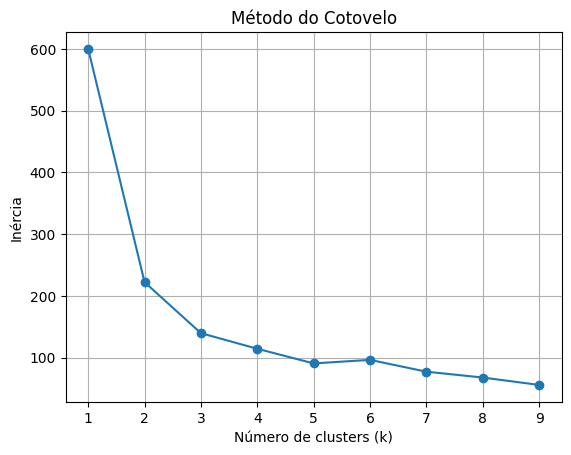

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


ii) Aplicar K-Means com k=3 (já que sabemos que existem 3 espécies, mas
isso é conhecimento externo; o cotovelo indicou outro valor?)

iii) Visualizar os clusters com todas as features

Centroídes (coordenadas PCA):
 [[ 1.1733857  -0.06642542]
 [-2.21642532  0.79656148]
 [-1.88109485 -0.94808038]]


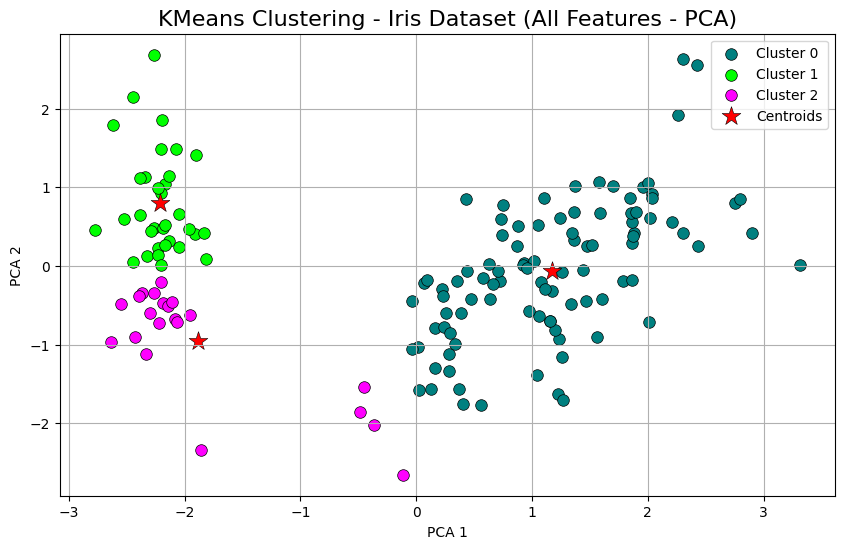

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar dados
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Escalonar todo o conjunto de dados
scaler = StandardScaler()
clustering_data = scaler.fit_transform(X)

# KMeans
kms = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_preds = kms.fit_predict(clustering_data)

# Criar DataFrame com os dados originais + cluster
clusters = X.copy()
clusters['Cluster_Prediction'] = cluster_preds

# Redução de dimensionalidade para visualização (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(clustering_data)

# Plot usando componentes principais
plt.figure(figsize=(10,6))
colors = ['teal', 'lime', 'magenta']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    plt.scatter(X_pca[cluster_preds == i, 0], X_pca[cluster_preds == i, 1],
                s=70, edgecolor='black', linewidth=0.5,
                c=colors[i], label=labels[i])

# Exibir os centróides em coordenadas PCA
centroids_pca = pca.transform(kms.cluster_centers_)
print("Centroídes (coordenadas PCA):\n", centroids_pca)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c='red', label='Centroids', edgecolor='black',
            linewidth=0.4, marker='*')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering - Iris Dataset (All Features - PCA)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


Posição dos centroídes pelo KMeans:
 [[ 1.02799959  1.12797813]
 [-1.30498732 -1.25489349]
 [ 0.3058728   0.16541778]]


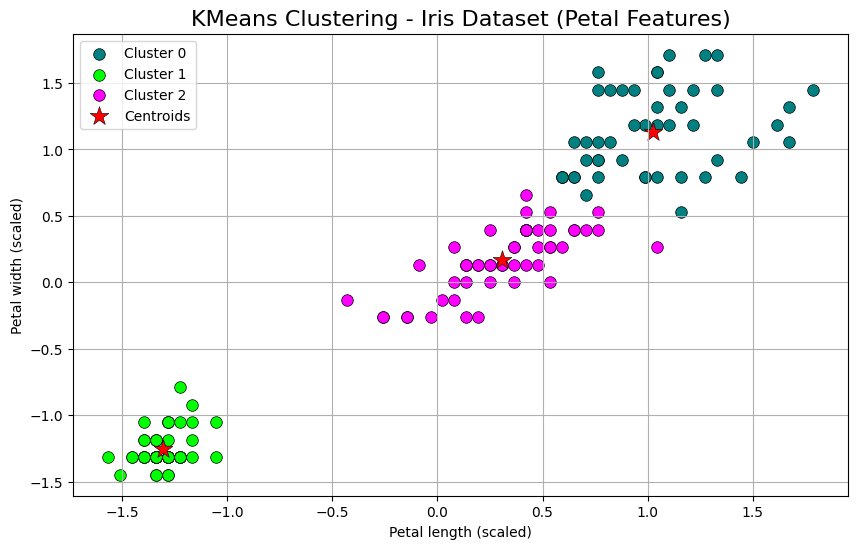

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar dados
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Selecionar apenas comprimento e largura da pétala
X_petal = X[['petal length (cm)', 'petal width (cm)']]

# Escalonar (opcional, mas recomendado para clustering)
scaler = StandardScaler()
clustering_data = scaler.fit_transform(X_petal)

# KMeans
kms = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_preds = kms.fit_predict(clustering_data)

# Criar DataFrame com os dados originais + cluster
clusters = X.copy()
clusters['Cluster_Prediction'] = cluster_preds

# Plot usando Petal Length e Petal Width escalonados
plt.figure(figsize=(10,6))
colors = ['teal', 'lime', 'magenta']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    plt.scatter(clustering_data[cluster_preds == i, 0],
                clustering_data[cluster_preds == i, 1],
                s=70, edgecolor='black', linewidth=0.5,
                c=colors[i], label=labels[i])

# Exibir os centróides
print("Posição dos centroídes pelo KMeans:\n", kms.cluster_centers_)

plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', edgecolor='black',
            linewidth=0.4, marker='*')

plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('KMeans Clustering - Iris Dataset (Petal Features)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


## Construindo os Dendogramas com diferentes métodos:

linkage: {'ward', 'complete', 'average', 'single'}, padrão='ward'
Qual critério de ligação usar. O critério de ligação determina qual distância usar entre conjuntos de observações. O algoritmo mesclará os pares de agrupamentos que minimizam esse critério.

* 'ward' minimiza a variância dos agrupamentos que estão sendo mesclados.
* 'average' usa a média das distâncias de cada observação dos dois conjuntos.
* 'complete' ou 'maximum' usa as distâncias máximas entre todas as observações dos dois conjuntos.
* 'single' usa o mínimo das distâncias entre todas as observações dos dois conjuntos.

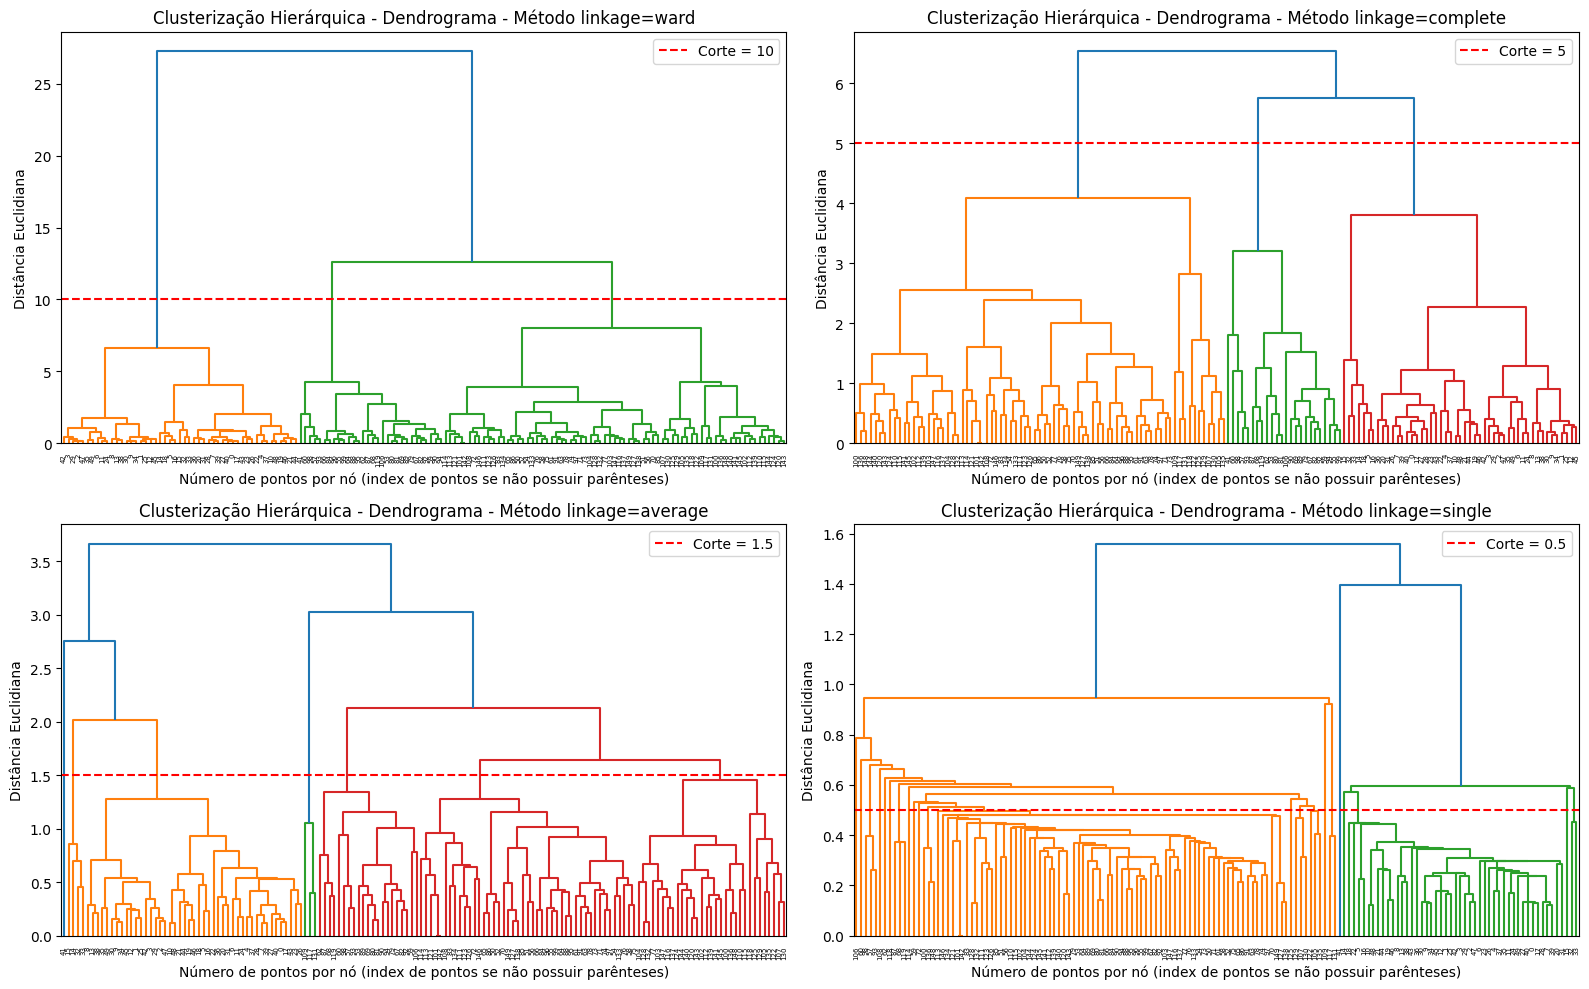

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Carregar e escalar os dados
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Métodos de linkage e seus respectivos valores de corte para visualização
methods = ['ward', 'complete', 'average', 'single']
cutoffs = [10, 5, 1.5, 0.5]  # Ajuste conforme necessário

# Criar os subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Plotar os 4 dendrogramas com linha de corte
for i, method in enumerate(methods):
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, ax=axes[i])
    axes[i].axhline(y=cutoffs[i], color='red', linestyle='--', label=f'Corte = {cutoffs[i]}')
    axes[i].set_title(f'Clusterização Hierárquica - Dendrograma - Método linkage={method}')
    axes[i].set_xlabel('Número de pontos por nó (index de pontos se não possuir parênteses)')
    axes[i].set_ylabel('Distância Euclidiana')
    axes[i].legend()

plt.tight_layout()
plt.show()


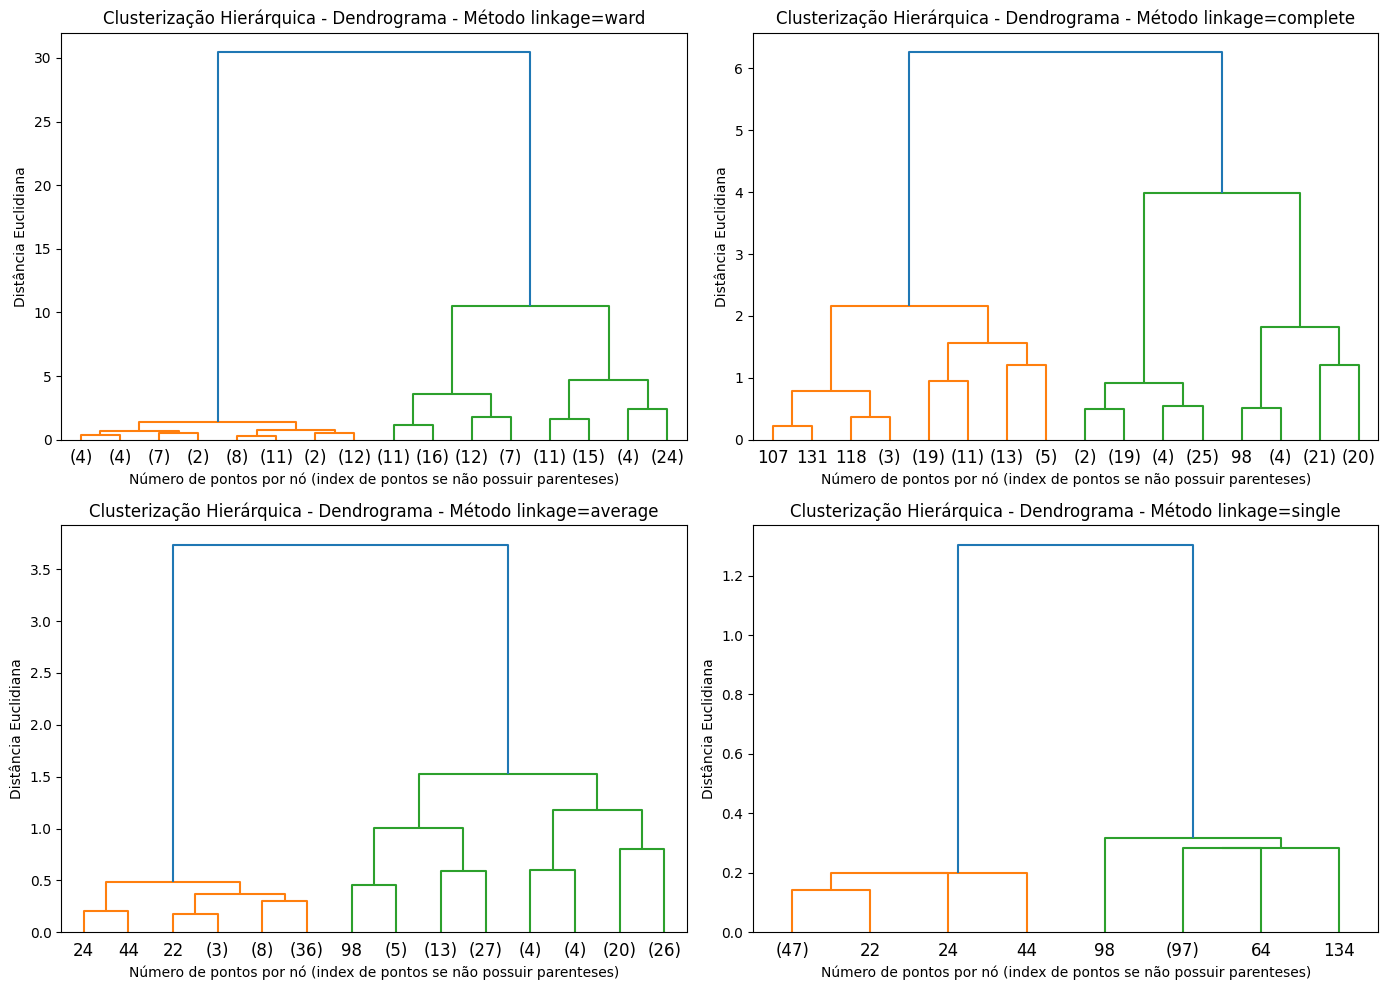

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Função auxiliar para plotar dendrogramas com modelo do sklearn
def plot_dendrogram(model, **kwargs):
    # Criar matriz de children para o dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, (left, right) in enumerate(model.children_):
        count = 0
        if left < n_samples:
            count += 1
        else:
            count += counts[left - n_samples]
        if right < n_samples:
            count += 1
        else:
            count += counts[right - n_samples]
        counts[i] = count

    linkage_matrix = np.column_stack([
        model.children_, model.distances_,
        counts
    ]).astype(float)

    # Plota o dendrograma
    dendrogram(linkage_matrix, **kwargs)

# Carrega o dataset
iris = load_iris()
X = iris.data[:, 2:4]  # apenas comprimento e largura da pétala

# Lista de métodos de linkage
#model = AgglomerativeClustering(n_clusters=3, distance_threshold=None, metric='manhattan',
                                #memory=None, connectivity=None, compute_full_tree='auto',
                                #linkage='average', compute_distances=True)
linkage_methods = ['ward', 'complete', 'average', 'single']

# Cria figura com 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop pelos métodos e cria dendrogramas
for i, method in enumerate(linkage_methods):
    model = AgglomerativeClustering(
        n_clusters=3,
        linkage=method,
        compute_distances=True
    ).fit(X)

    plt.sca(axes[i])
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.title(f'Clusterização Hierárquica - Dendrograma - Método linkage={method}')
    plt.xlabel("Número de pontos por nó (index de pontos se não possuir parenteses)")
    plt.ylabel("Distância Euclidiana")

plt.tight_layout()
plt.show()


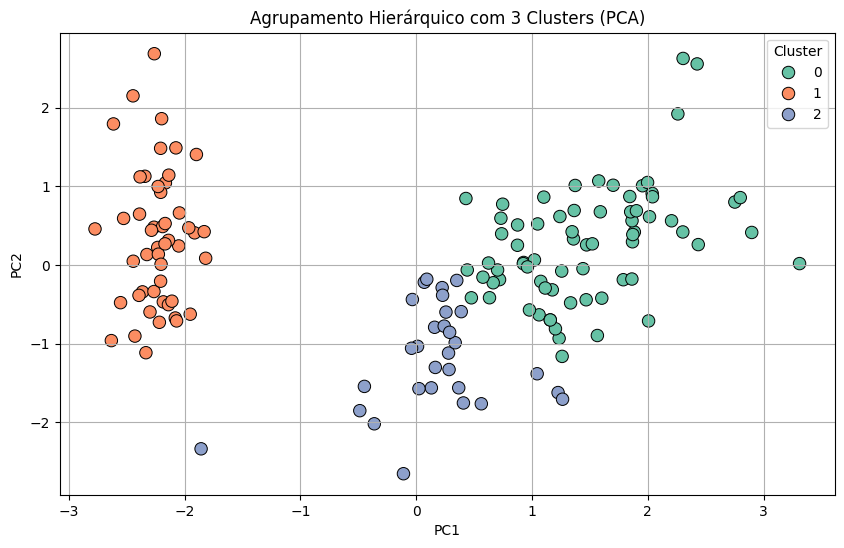

=== Avaliação dos Agrupamentos ===
K-Means ARI: 0.5923
Agglomerative ARI: 0.6153
K-Means Silhouette Score: 0.4630
Agglomerative Silhouette Score: 0.4467


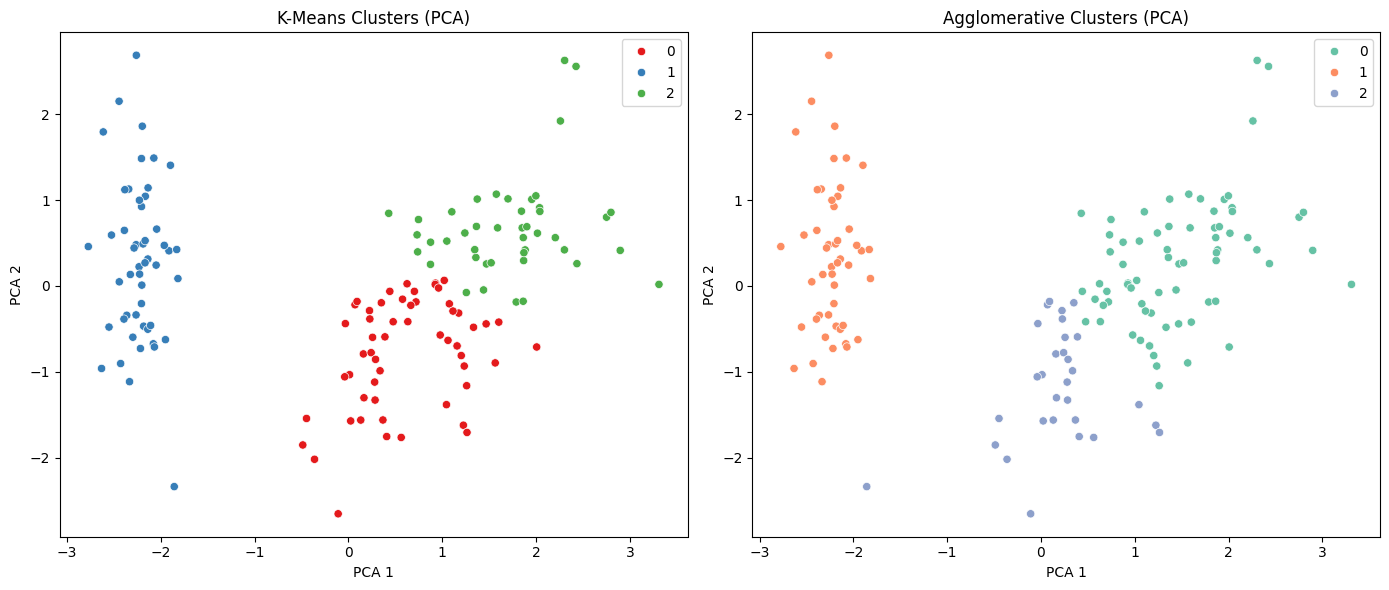

In [ ]:
# Carregar o dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Aplicar Agglomerative Clustering com 3 clusters
agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = agg.fit_predict(clustering_data)

# 3. Visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(clustering_data)

df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=80, edgecolor='black')
plt.title('Agrupamento Hierárquico com 3 Clusters (PCA)')
plt.grid(True)
plt.show()

# 4. Avaliação - Silhouette Score e ARI
sil_score = silhouette_score(clustering_data, cluster_labels)
ari_score = adjusted_rand_score(y, cluster_labels)

# 5. Avaliação com ARI e Silhouette Score
print("=== Avaliação dos Agrupamentos ===")
print(f"K-Means ARI: {adjusted_rand_score(y, cluster_preds):.4f}")
print(f"Agglomerative ARI: {adjusted_rand_score(y, cluster_labels):.4f}")
print(f"K-Means Silhouette Score: {silhouette_score(clustering_data, cluster_preds):.4f}")
print(f"Agglomerative Silhouette Score: {silhouette_score(clustering_data, cluster_labels):.4f}")

# 6. Visualização dos clusters encontrados (2D PCA)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_preds, palette='Set1', ax=axes[0])
axes[0].set_title("K-Means Clusters (PCA)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set2', ax=axes[1])
axes[1].set_title("Agglomerative Clusters (PCA)")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


Separação das espécies pelo K-Means:
O algoritmo K-Means geralmente consegue identificar bem a classe Setosa, pois ela está bem separada das outras. No entanto, ele pode ter dificuldades em distinguir entre Versicolor e Virginica, pois essas duas possuem características mais semelhantes.

Qualidade dos agrupamentos:

O ARI (Adjusted Rand Index) mede a similaridade entre os clusters e as classes reais, corrigido pelo acaso. Quanto mais próximo de 1, melhor.
O Silhouette Score mede a compactação e separação dos clusters. Quanto mais próximo de 1, melhor.

Utilizamos a função AgglomerativeClustering com distance_threshold=0 para construir a hierarquia completa de agrupamentos.


=== Avaliação dos Modelos de Clustering ===
                            Silhouette  Davies-Bouldin  Calinski-Harabasz  \
KMeans (4 features)              0.480           0.789            157.360   
Agglomerative (4 features)       0.447           0.803            222.719   
KMeans (2 features)              0.674           0.475           1149.668   
Agglomerative (2 features)       0.610           0.501            776.809   

                              ARI  
KMeans (4 features)         0.433  
Agglomerative (4 features)  0.615  
KMeans (2 features)         0.886  
Agglomerative (2 features)  0.636  


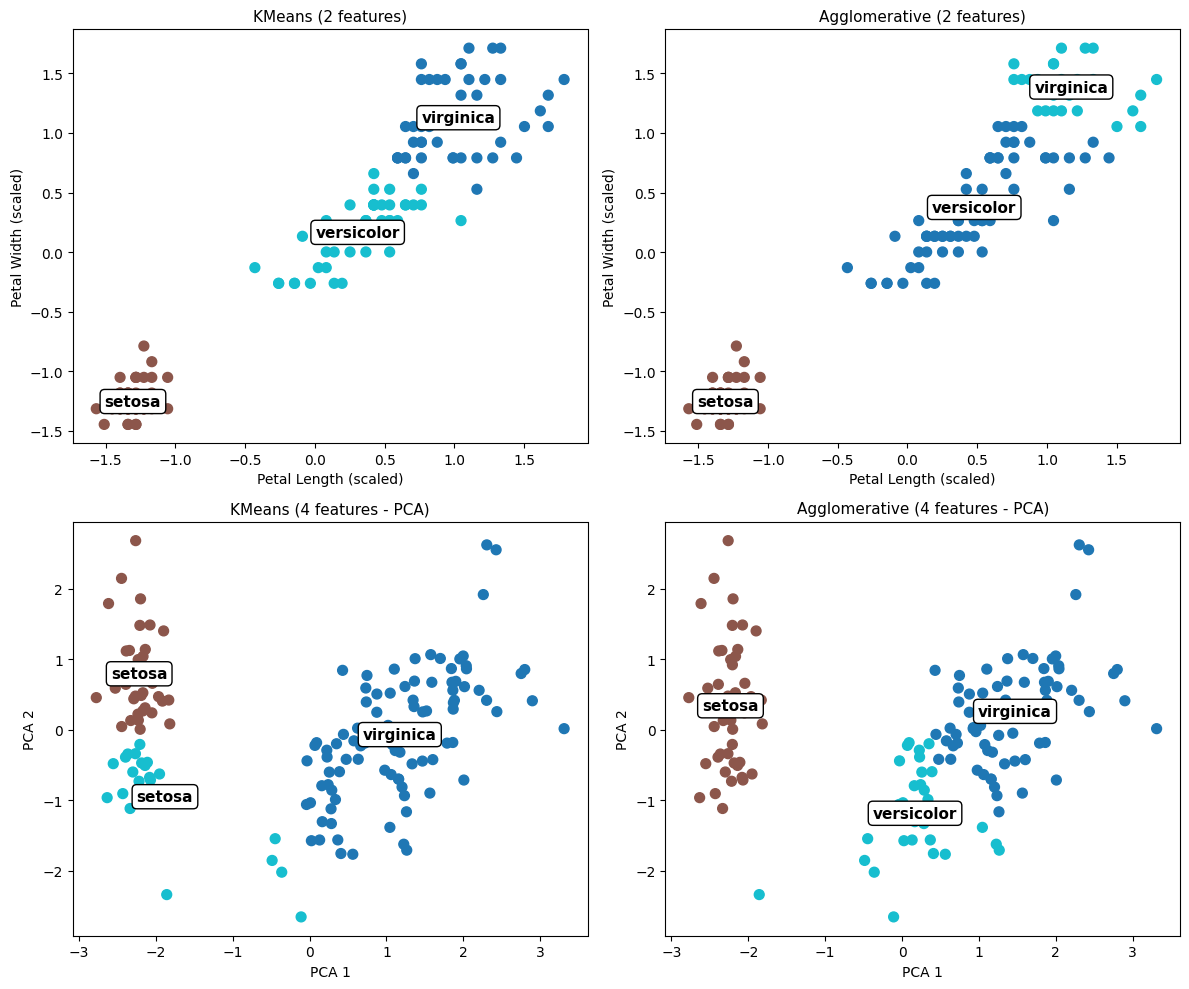

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score,
    davies_bouldin_score, calinski_harabasz_score
)
from sklearn.decomposition import PCA
from scipy.stats import mode

# --- Carregar dados ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# --- Escalonamento ---
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X)

X_2feat = X[['petal length (cm)', 'petal width (cm)']]
scaler_2f = StandardScaler()
X_2f_scaled = scaler_2f.fit_transform(X_2feat)

# --- Função de avaliação ---
def avaliar_cluster(X_scaled, labels, y_true=None):
    metrics = {
        "Silhouette": silhouette_score(X_scaled, labels),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels),
    }
    if y_true is not None:
        metrics["ARI"] = adjusted_rand_score(y_true, labels)
    return metrics

# --- Modelos ---
kmeans_all = KMeans(n_clusters=3, random_state=42)
kmeans_all_labels = kmeans_all.fit_predict(X_all_scaled)

kmeans_2f = KMeans(n_clusters=3, random_state=42)
kmeans_2f_labels = kmeans_2f.fit_predict(X_2f_scaled)

agg_all = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_all_labels = agg_all.fit_predict(X_all_scaled)

agg_2f = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_2f_labels = agg_2f.fit_predict(X_2f_scaled)

# --- Avaliação ---
results = {
    "KMeans (4 features)": avaliar_cluster(X_all_scaled, kmeans_all_labels, y),
    "Agglomerative (4 features)": avaliar_cluster(X_all_scaled, agg_all_labels, y),
    "KMeans (2 features)": avaliar_cluster(X_2f_scaled, kmeans_2f_labels, y),
    "Agglomerative (2 features)": avaliar_cluster(X_2f_scaled, agg_2f_labels, y),
}

# --- Tabela com resultados ---
results_df = pd.DataFrame(results).T
print("\n=== Avaliação dos Modelos de Clustering ===")
print(results_df.round(3))

# --- Mapeamento de cluster para nome real ---
def map_clusters_to_names(true_labels, cluster_labels):
    mapping = {}
    for cluster_id in np.unique(cluster_labels):
        most_common = mode(true_labels[cluster_labels == cluster_id], keepdims=True).mode[0]
        mapping[cluster_id] = iris.target_names[most_common]
    return mapping

# --- Função para plotar com nomes reais ---
def plot_clusters_named(ax, data, labels, true_labels, title, xlabel, ylabel):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=50)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Mapeia os clusters para nomes reais
    name_map = map_clusters_to_names(true_labels, labels)

    for cluster_id in np.unique(labels):
        x_mean = data[labels == cluster_id][:, 0].mean()
        y_mean = data[labels == cluster_id][:, 1].mean()
        label_name = name_map[cluster_id]
        ax.text(x_mean, y_mean, label_name, fontsize=11, weight='bold',
                color='black', ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# --- PCA para reduzir para 2D ---
pca = PCA(n_components=2)
X_all_pca = pca.fit_transform(X_all_scaled)

# --- Plot ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_clusters_named(axes[0, 0], X_2f_scaled, kmeans_2f_labels, y,
                    "KMeans (2 features)", "Petal Length (scaled)", "Petal Width (scaled)")

plot_clusters_named(axes[0, 1], X_2f_scaled, agg_2f_labels, y,
                    "Agglomerative (2 features)", "Petal Length (scaled)", "Petal Width (scaled)")

plot_clusters_named(axes[1, 0], X_all_pca, kmeans_all_labels, y,
                    "KMeans (4 features - PCA)", "PCA 1", "PCA 2")

plot_clusters_named(axes[1, 1], X_all_pca, agg_all_labels, y,
                    "Agglomerative (4 features - PCA)", "PCA 1", "PCA 2")

plt.tight_layout()
plt.show()



=== Avaliação dos Modelos de Clustering ===
                            Silhouette  Davies-Bouldin  Calinski-Harabasz  \
KMeans (4 features)              0.480           0.789            157.360   
Agglomerative (4 features)       0.447           0.803            222.719   
KMeans (2 features)              0.674           0.475           1149.668   
Agglomerative (2 features)       0.610           0.501            776.809   

                              ARI  
KMeans (4 features)         0.433  
Agglomerative (4 features)  0.615  
KMeans (2 features)         0.886  
Agglomerative (2 features)  0.636  


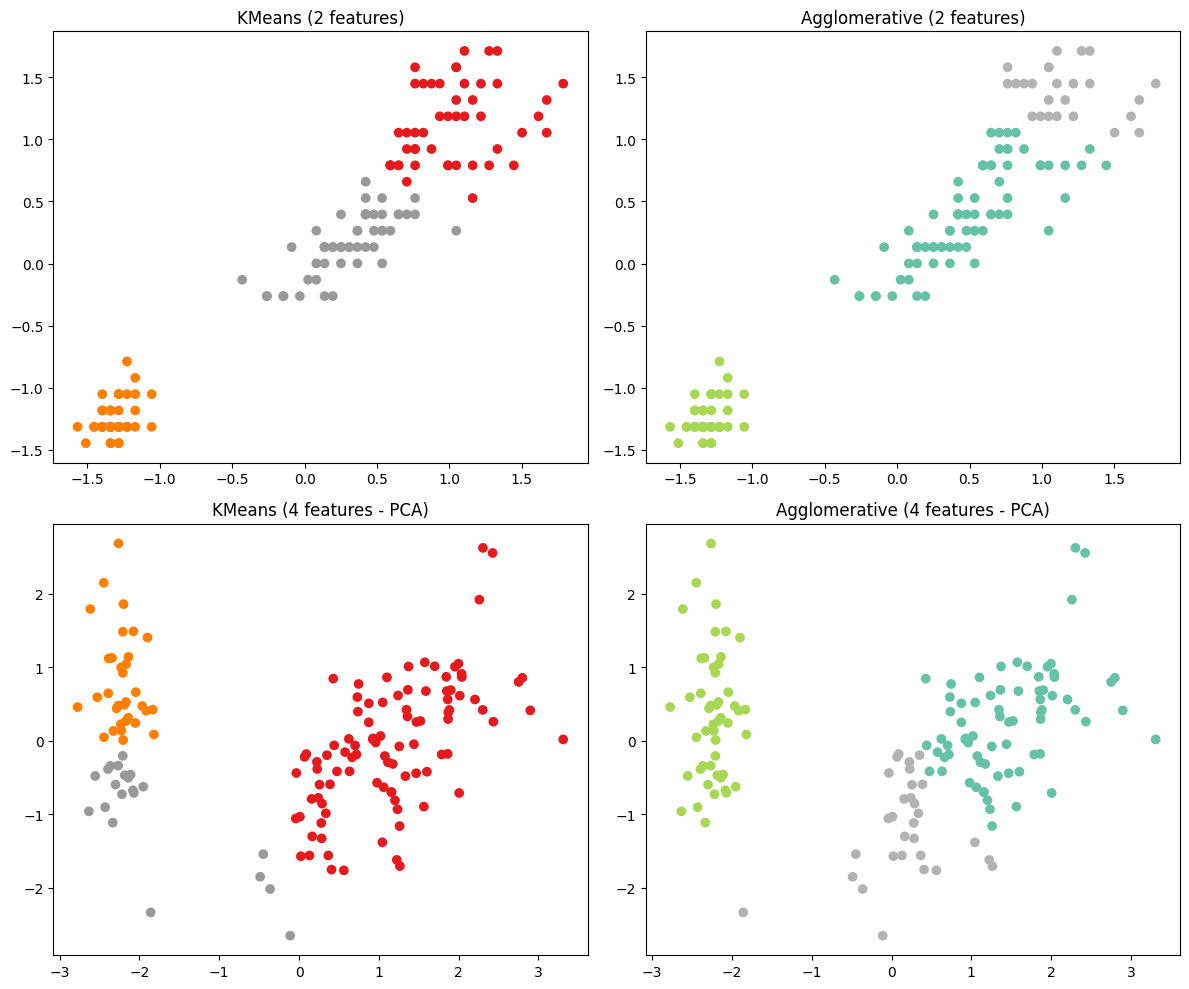

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score,
    davies_bouldin_score, calinski_harabasz_score
)
from sklearn.decomposition import PCA

# Carregar dados
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 1. Escalonamento
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X)

X_2feat = X[['petal length (cm)', 'petal width (cm)']]
scaler_2f = StandardScaler()
X_2f_scaled = scaler_2f.fit_transform(X_2feat)

# Função para calcular todas as métricas
def avaliar_cluster(X_scaled, labels, y_true=None):
    metrics = {
        "Silhouette": silhouette_score(X_scaled, labels),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels),
    }
    if y_true is not None:
        metrics["ARI"] = adjusted_rand_score(y_true, labels)
    return metrics

# --- KMEANS ---
kmeans_all = KMeans(n_clusters=3, random_state=42)
kmeans_all_labels = kmeans_all.fit_predict(X_all_scaled)

kmeans_2f = KMeans(n_clusters=3, random_state=42)
kmeans_2f_labels = kmeans_2f.fit_predict(X_2f_scaled)

# --- AGGLOMERATIVE ---
agg_all = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_all_labels = agg_all.fit_predict(X_all_scaled)

agg_2f = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_2f_labels = agg_2f.fit_predict(X_2f_scaled)

# --- Avaliação ---
results = {
    "KMeans (4 features)": avaliar_cluster(X_all_scaled, kmeans_all_labels, y),
    "Agglomerative (4 features)": avaliar_cluster(X_all_scaled, agg_all_labels, y),
    "KMeans (2 features)": avaliar_cluster(X_2f_scaled, kmeans_2f_labels, y),
    "Agglomerative (2 features)": avaliar_cluster(X_2f_scaled, agg_2f_labels, y),
}

# --- Mostrar resultados em tabela ---
results_df = pd.DataFrame(results).T
print("\n=== Avaliação dos Modelos de Clustering ===")
print(results_df.round(3))

# --- Visualizações ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
pca = PCA(n_components=2)
X_all_pca = pca.fit_transform(X_all_scaled)

# KMeans - 2 features
axes[0, 0].scatter(X_2f_scaled[:, 0], X_2f_scaled[:, 1], c=kmeans_2f_labels, cmap='Set1')
axes[0, 0].set_title("KMeans (2 features)")


# Agglomerative - 2 features
axes[0, 1].scatter(X_2f_scaled[:, 0], X_2f_scaled[:, 1], c=agg_2f_labels, cmap='Set2')
axes[0, 1].set_title("Agglomerative (2 features)")

# KMeans - PCA
axes[1, 0].scatter(X_all_pca[:, 0], X_all_pca[:, 1], c=kmeans_all_labels, cmap='Set1')
axes[1, 0].set_title("KMeans (4 features - PCA)")

# Agglomerative - PCA
axes[1, 1].scatter(X_all_pca[:, 0], X_all_pca[:, 1], c=agg_all_labels, cmap='Set2')
axes[1, 1].set_title("Agglomerative (4 features - PCA)")

plt.tight_layout()
plt.show()

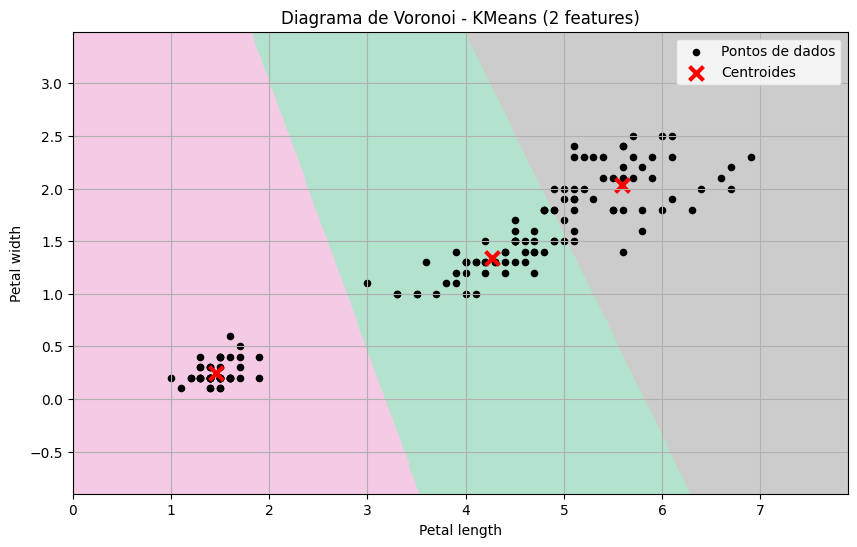

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar dados
iris = load_iris()
X = iris.data[:, [2, 3]]  # Apenas petal length e petal width
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Gerar malha para Voronoi
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2_r, aspect='auto', origin='lower')

# Plotar pontos
plt.scatter(X[:, 0], X[:, 1], c='k', s=20, label='Pontos de dados')

# Plotar centroides
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=3, color='red', label='Centroides')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Diagrama de Voronoi - KMeans (2 features)')
plt.legend()
plt.grid(True)
plt.show()



Silhouette Score: quanto mais próximo de 1, melhor a separação entre clusters.

Davies-Bouldin: quanto menor, melhor (menos sobreposição).

Calinski-Harabasz: quanto maior, melhor (maior separação e coesão interna).

ARI (Adjusted Rand Index): mede o quão próximo o agrupamento está da classificação real. 1.0 = perfeito.

Ao utilizar apenas as duas features mais relevantes (comprimento e largura da pétala), observamos que tanto o KMeans quanto o Agglomerative Clustering obtiveram ARI e Silhouette Score comparáveis ou até superiores aos resultados obtidos com todas as quatro features. Isso sugere que as features escolhidas são mais discriminantes entre as espécies, e que remover variáveis menos informativas pode facilitar a separação entre os grupos. Além disso, a visualização dos clusters com duas dimensões se torna mais clara e interpretável.

n_clusters   Sem Escalonar        Com Escalonar       
-------------------------------------------------------
2            0.6810               0.5818              
3            0.5512               0.4799              
4            0.4976               0.3850              
5            0.4931               0.3450              
6            0.3678               0.3339              


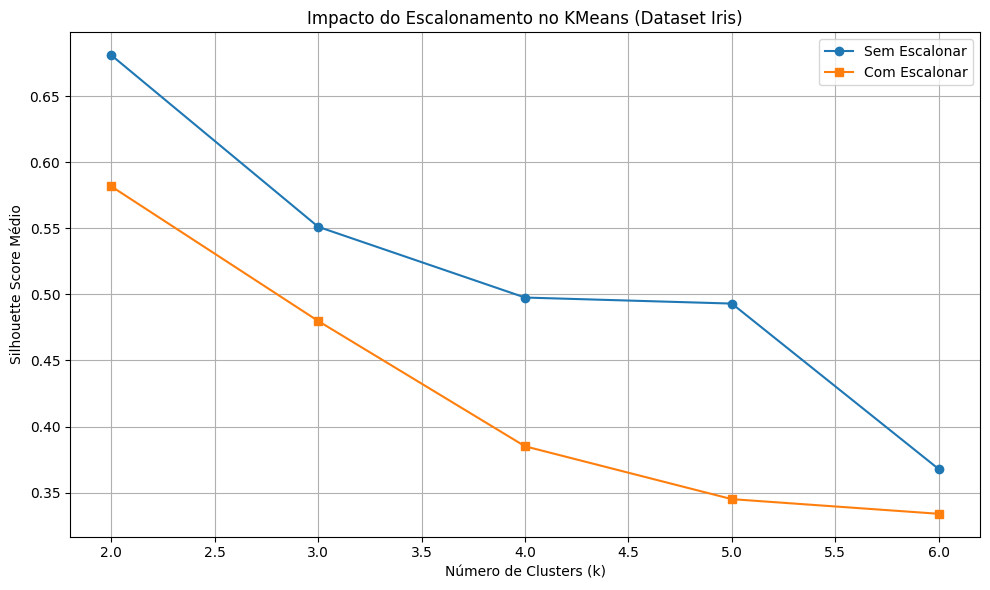

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Carregar o dataset Iris
iris = load_iris()
X = iris.data

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir número de clusters a testar
range_n_clusters = [2, 3, 4, 5, 6]

# Armazenar resultados
scores_no_scale = []
scores_scaled = []

print(f"{'n_clusters':<12} {'Sem Escalonar':<20} {'Com Escalonar':<20}")
print("-" * 55)

for n_clusters in range_n_clusters:
    # KMeans sem escalonamento
    kmeans_no_scale = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    labels_no_scale = kmeans_no_scale.fit_predict(X)
    score_no_scale = silhouette_score(X, labels_no_scale)
    scores_no_scale.append(score_no_scale)

    # KMeans com escalonamento
    kmeans_scaled = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    labels_scaled = kmeans_scaled.fit_predict(X_scaled)
    score_scaled = silhouette_score(X_scaled, labels_scaled)
    scores_scaled.append(score_scaled)

    print(f"{n_clusters:<12} {score_no_scale:<20.4f} {score_scaled:<20.4f}")

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, scores_no_scale, marker='o', label='Sem Escalonar')
plt.plot(range_n_clusters, scores_scaled, marker='s', label='Com Escalonar')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score Médio')
plt.title('Impacto do Escalonamento no KMeans (Dataset Iris)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.681
For n_clusters = 3, the average silhouette_score is : 0.551
For n_clusters = 4, the average silhouette_score is : 0.495


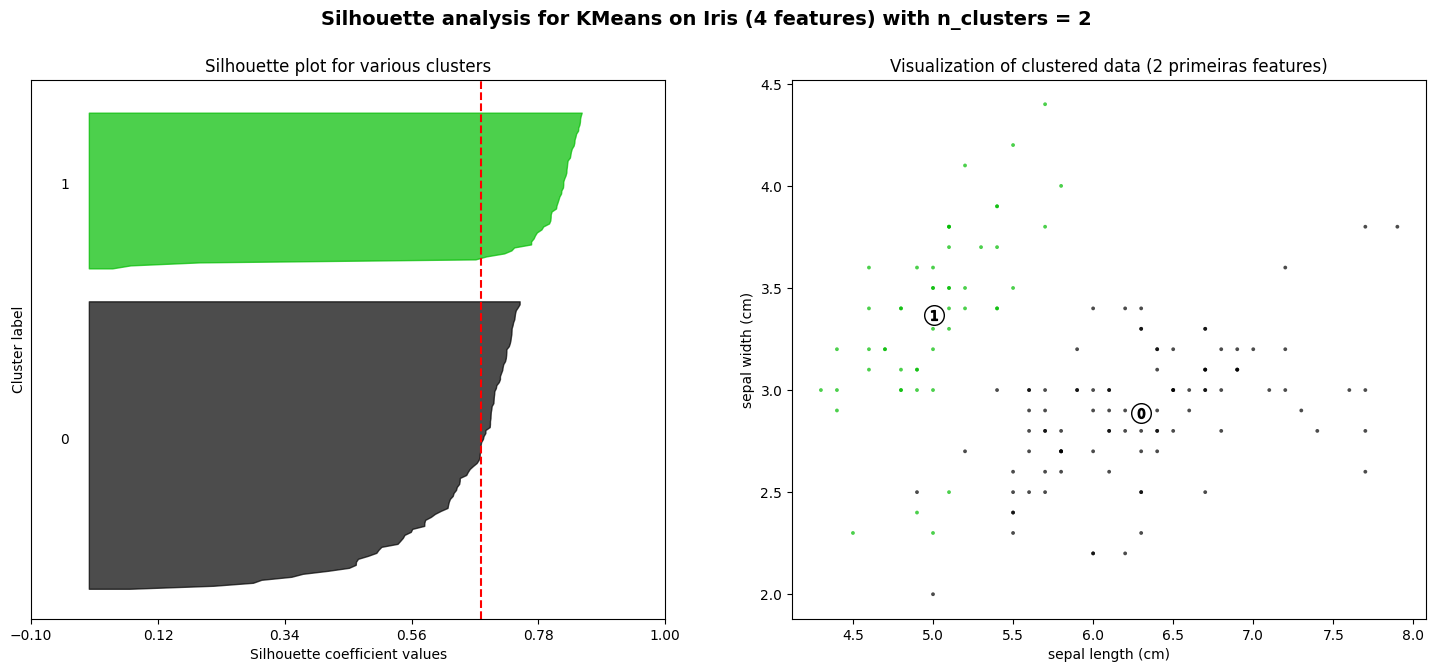

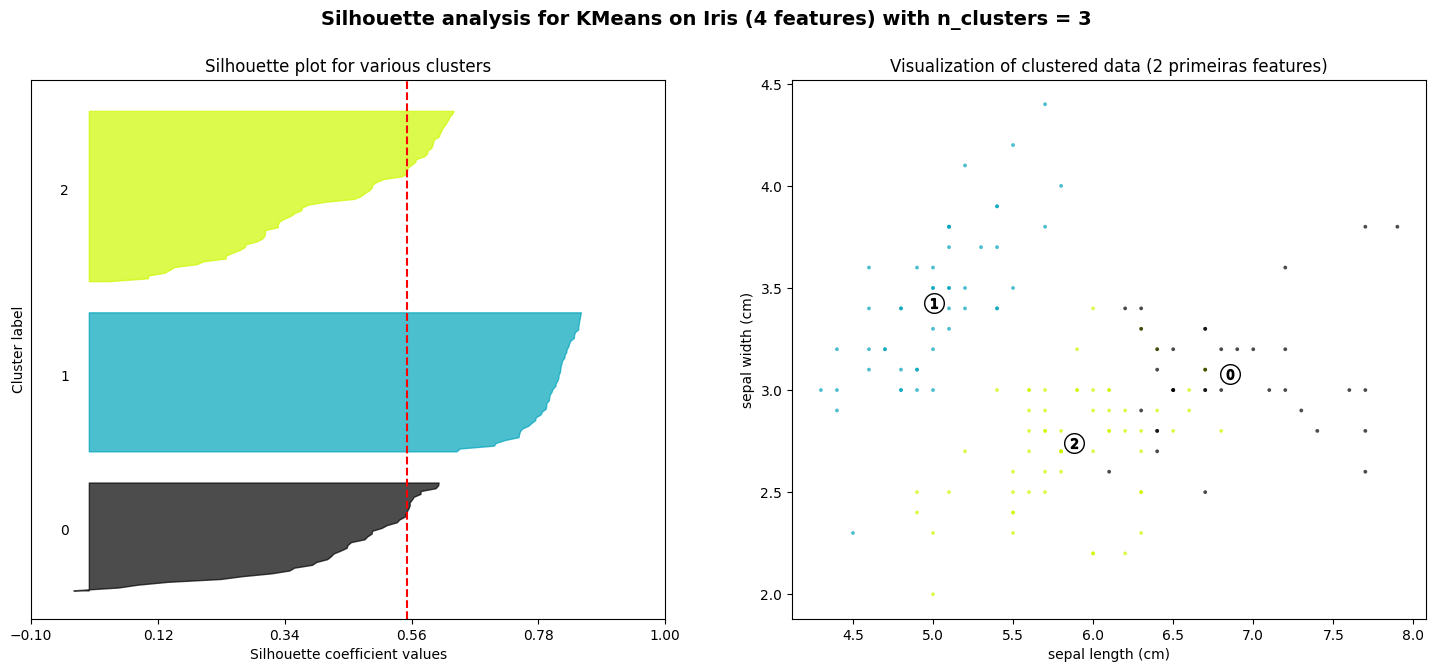

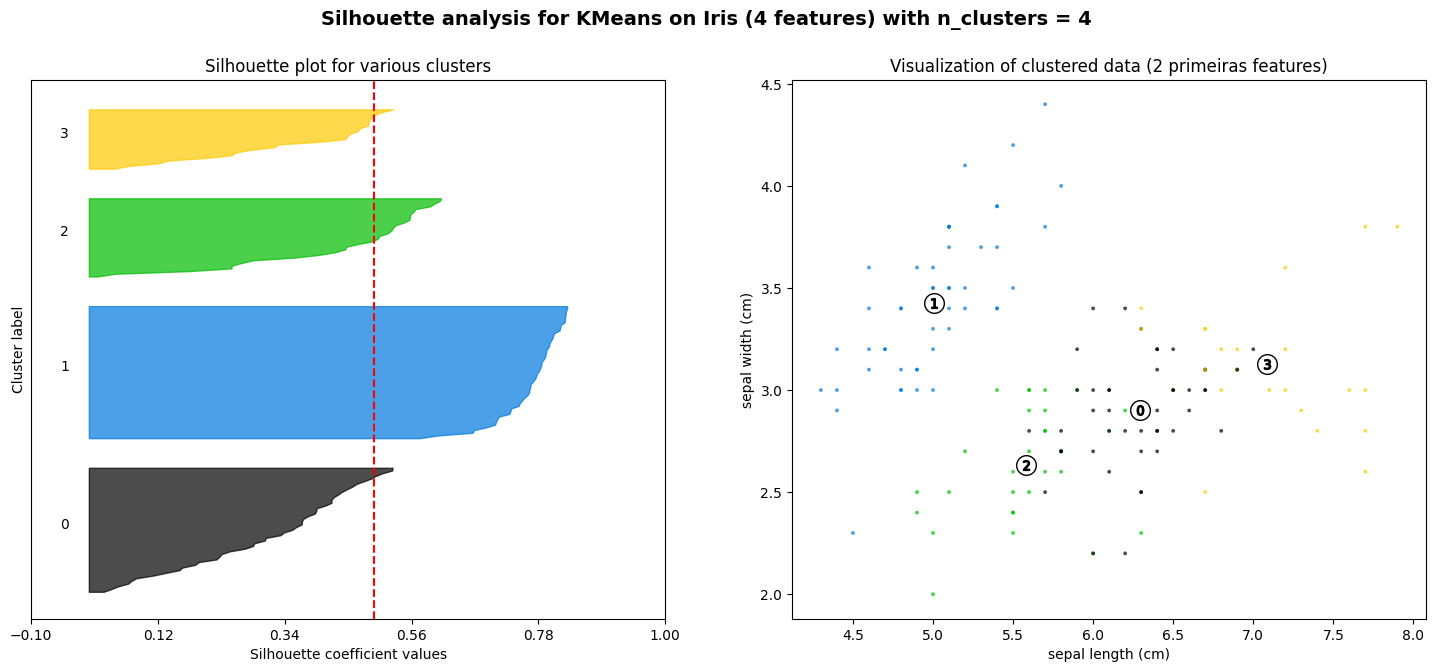

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples, silhouette_score

# Carrega o dataset Iris completo (todas as 4 features)
iris = load_iris()
X = iris.data  # Todas as 4 features

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}"
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.linspace(-0.1, 1, 6))

    # Para visualização, usamos apenas as 2 primeiras features (não influencia na clusterização)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", s=200, edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", s=50, edgecolor="k")

    ax2.set_title("Visualization of clustered data (2 primeiras features)")
    ax2.set_xlabel(iris.feature_names[0])
    ax2.set_ylabel(iris.feature_names[1])

    plt.suptitle(
        f"Silhouette analysis for KMeans on Iris (4 features) with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()
